## Question 1

### Setup

<table style="font-size:16px; width: 400px; height: 200px; text-align: center;">
  <tr>
    <th>Actual/Predicted</th>
    <th>P</th>
    <th>N</th>
  </tr>

  <tr>
    <td>P</td>
    <td>15</td>
    <td>5</td>
  </tr>

  <tr>
    <td>N</td>
    <td>4</td>
    <td>16</td>
  </tr>
</table>

<div style="font-size:16px;">
    <ul>
        <li> Number of positive results by this test: $\displaystyle 19$ </li>
        <li> Percentage of true Covid-19 detected: $\displaystyle \frac{15}{15+5} = \frac{15}{20} = 75.0\text{%}$</li>
        <li> False positive rate: $\displaystyle \frac{4}{15+4+5+16} = \frac{4}{40} = 10.0\text{%}$</li>
    </ul>
</div>

## Question 2

### Part (a)

<table style="font-size: 16px;">
  <tr>
    <th>Index $k$</th>
    <th>$1$</th>
    <th>$2$</th>
    <th>$3$</th>
    <th>$4$</th>
    <th>$5$</th>
    <th>$6$</th>
    <th>$7$</th>
    <th>$8$</th>
    <th>$9$</th>
    <th>$10$</th>
  </tr>

  <tr>
    <td>$$P(t(k) = 1|x(k))$$</td>
    <td>$0.05$</td>
    <td>$0.15$</td>
    <td>$0.40$</td>
    <td>$0.55$</td>
    <td>$0.25$</td>
    <td>$0.45$</td>
    <td>$0.48$</td>
    <td>$0.62$</td>
    <td>$0.67$</td>
    <td>$0.75$</td>
  </tr>

  <tr>
    <td>True Label</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
  </tr>

  <tr>
    <td>Predicted Label $y(k)$</td>
    <td>$0$</td>
    <td>$0$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$0$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
    <td>$1$</td>
  </tr>
</table>

### Part (b)

#### Confusion Matrix

<table style="font-size: 16px; text-align: center;">
  <tr>
    <th>$\text{Actual/Predicted}$</th>
    <th>$\text{P (1)}$</th>
    <th>$\text{N (0)}$</th>
  </tr>

  <tr>
    <td>$\text{P (1)}$</td>
    <td>$5$</td>
    <td>$1$</td>
  </tr>

  <tr>
    <td>$\text{N (0)}$</td>
    <td>$2$</td>
    <td>$2$</td>
  </tr>
</table>

### Part (c)

<table style="font-size:16px; text-align: center;">
  <tr>
    <th>Quantity</th>
    <th>Value</th>
  </tr>

  <tr>
    <td>Sensitivity</td>
    <td>$$\frac{5}{5+1} = \frac{5}{6}$$</td>
  </tr>

  <tr>
    <td>Specificity</td>
    <td>$$\frac{2}{2+2} = \frac{1}{2}$$</td>
  </tr>

  <tr>
    <td>Pr. False Alarm</td>
    <td>$$\frac{2}{2+2} = \frac{1}{2}$$</td>
  </tr>

  <tr>
    <td>Pr. Misclassification</td>
    <td>$$\frac{1}{5+1} = \frac{1}{6}$$</td>
  </tr>

  <tr>
    <td>Precision</td>
    <td>$$\frac{5}{5+2} = \frac{5}{7}$$</td>
  </tr>

  <tr>
    <td>Recall</td>
    <td>$$\frac{5}{5+1} = \frac{5}{6}$$</td>
  </tr>

  <tr>
    <td>Classification Rate</td>
    <td>$$\frac{5+2}{5+2+2+1} = \frac{1}{2}$$</td>
  </tr>
</table>

In [1]:
# Question 2 part (d)

# Setup
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

plt.style.use('dark_background')

prob = np.array([0.05, 0.15, 0.40, 0.55, 0.25, 0.45, 0.48, 0.62, 0.67, 0.75])
y_true = np.array([0]*4 + [1]*6)

print(f'posterior probablities = {prob}')
print(f'actual labels = {y_true}')

posterior probablities = [0.05 0.15 0.4  0.55 0.25 0.45 0.48 0.62 0.67 0.75]
actual labels = [0 0 0 0 1 1 1 1 1 1]


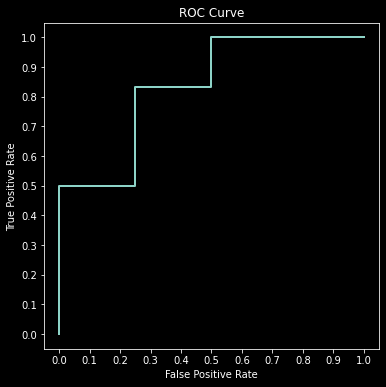

In [2]:
# Question 2 part (d) continued

def predict(pr, b):
    return (pr > b).astype(int)

def get_fpr_tpr(y_t, y_p):
    cm = confusion_matrix(y_t, y_p)
    fp, tp, fn, tn = cm[0, 1], cm[1, 1], cm[1, 0], cm[0, 0]
    fpr = fp / max(fp + tn, 1)
    tpr = tp / max(tp + fn, 1)
    return fpr, tpr
    

fpr_tpr_list = []
    
# list of fpr and tpr
for b in np.arange(0., 1., 0.05):
    y_pred = predict(prob, b)
    fpr, tpr = get_fpr_tpr(y_true, y_pred)
    fpr_tpr_list.append((fpr, tpr))

fpr_tpr = np.array(fpr_tpr_list)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(fpr_tpr[:, 0], fpr_tpr[:, 1], linewidth=2)
ax.set_xlabel('False Positive Rate')
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('True Positive Rate')
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_title('ROC Curve')

plt.show()

In [3]:
# Question 2 part (d) continued

def roc_auc(fpr, tpr):
    indices = np.argsort(fpr)
    fpr = fpr[indices]
    tpr = tpr[indices]
    area = 0.
    for i in range(len(fpr) - 1):
        a = tpr[i]
        b = tpr[i + 1]
        h = fpr[i + 1] - fpr[i]
        area += 0.5 * h * (a + b)
    return area

# Calculating Area Under the ROC Curve
auc = roc_auc(fpr_tpr[:, 0], fpr_tpr[:, 1])

# Rounded to 5 decimals
print(f'{auc = :.5f}')

auc = 0.77083


In [4]:
# Question 3

# Setup
filename = 'mnist_test.csv'

mnist = np.genfromtxt(filename, delimiter=',')
features, labels = mnist[:, 1:], mnist[:, 0]

N = mnist.shape[0] 
feature_dimension = mnist.shape[1] - 1

# part (a)
print(f'Number of samples {N = }')
print(f'Feature Dimension = {feature_dimension}')

Number of samples N = 10000
Feature Dimension = 784


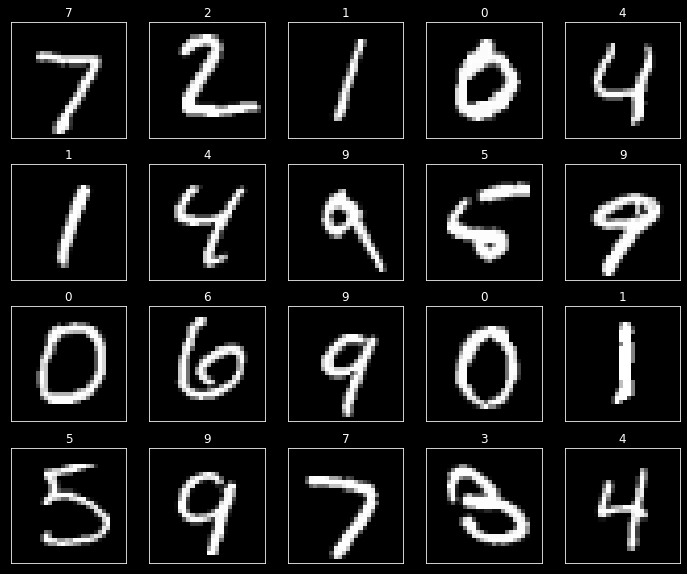

In [5]:
# Question 3 part (b)

def visualize(matrix):
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12, 10))

    for i in range(20):
        r, c = divmod(i, 5)
        axs[r, c].imshow(np.reshape(matrix[i], (28, 28)), cmap=plt.get_cmap('gray'))
        axs[r, c].set_title(f'{int(labels[i])}')
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

    plt.show()

visualize(features)

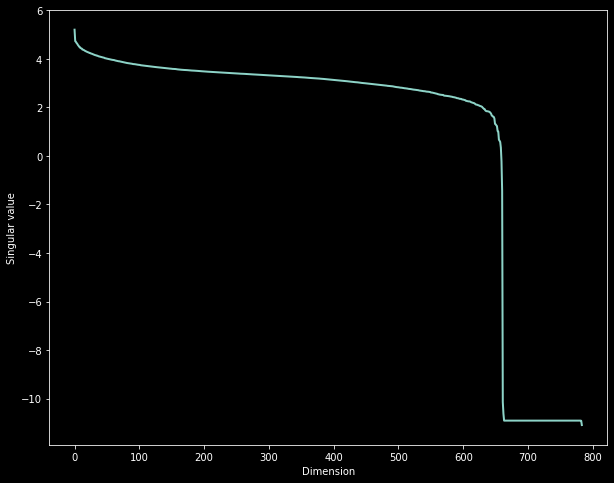

In [6]:
# Question 3 part (c)

X = features

U, S, Vh = np.linalg.svd(X, full_matrices=False)

S = np.log10(S)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax.plot(np.arange(*S.shape), S, linewidth=2)
ax.set_xlabel('Dimension')
ax.set_ylabel('Singular value')

plt.show()

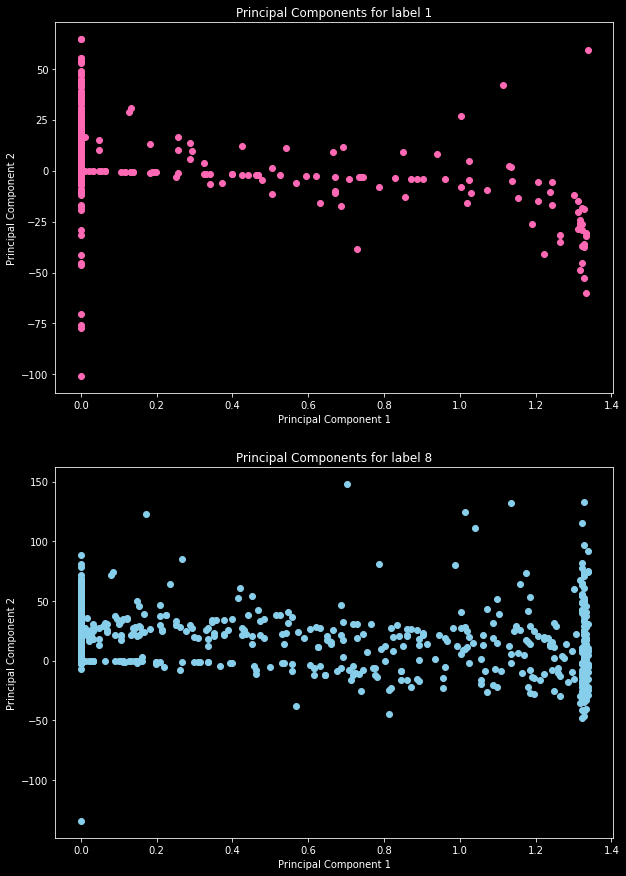

In [7]:
# Question 3 part (d)

V = Vh[:, :2]

Z = np.array([X[i] @ V for i in range(len(X))])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

label1 = labels == 1
label8 = labels == 8

ax1.scatter(Z[label1][:, 0], Z[label1][:, 1], c='hotpink')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('Principal Components for label 1')

ax2.scatter(Z[label8][:, 0], Z[label8][:, 1], c='skyblue')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Principal Components for label 8')

plt.show()

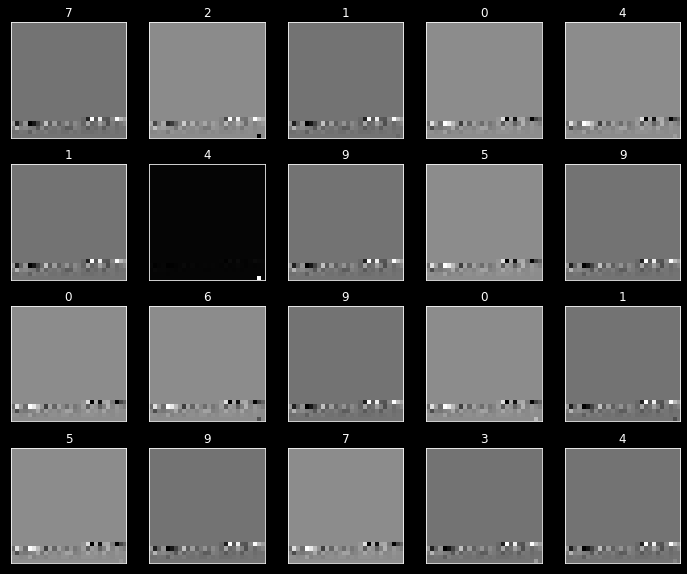

In [8]:
# Question 3 part (e)

Xh = Z @ V.T

visualize(Xh)

In [9]:
# Question 4

# setup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_score

filename = 'winequality-red.csv'

data = np.genfromtxt(filename, delimiter=',')

# Label column was not specified, but inferred from data
X, y = data[1:, :-1], data[1:, -1]

print(f'{X.shape = }')
print(f'{y.shape = }')

X.shape = (1599, 11)
y.shape = (1599,)


In [10]:
# Question 4, continued

# Divide training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_train.shape = (1119, 11)
y_train.shape = (1119,)
X_test.shape = (480, 11)
y_test.shape = (480,)


In [11]:
# Question 4, continued

# Build a model
model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# 3-Fold Cross Validation
cv3_scores = cross_val_score(model, X_train, y_train, cv=3)

print(f'Mean of Cross Validation scores: {np.mean(cv3_scores)}')

Mean of Cross Validation scores: 0.4664879356568365
